In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Train.csv")
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [4]:
data.duplicated().sum()

0

In [5]:
data = data.drop('id', axis = 1).copy()
data

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [6]:
for col in data:
    print(col, '   \n')
    print(data[col].value_counts(), ' \n\n')

customer_age    

34.0    1369
33.0    1344
32.0    1312
31.0    1258
36.0    1223
        ... 
95.0       1
97.0       1
89.0       1
93.0       1
92.0       1
Name: customer_age, Length: 77, dtype: int64  


job_type    

blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64  


marital    

married     18945
single       8857
divorced     3695
Name: marital, dtype: int64  


education    

secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: education, dtype: int64  


default    

no     31094
yes      553
Name: default, dtype: int64  


balance    

 3.0        350
 1.0        324
 0.0        310
 4.0        298
-1.0        285
           ... 
 8110.0       1
-841.0        1
 11420.0      1
 5640.0       1
-511.0     

In [7]:
data.isnull().sum() 

customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [8]:
def replace_mf(data):
    data['marital'].replace('married', 0, inplace=True)
    data['marital'].replace('single', 1, inplace=True)
    data['marital'].replace('divorced', 2, inplace=True)
    return data

data = replace_mf(data)
data

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,1.0,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,34.0,blue-collar,0.0,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,46.0,technician,0.0,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,34.0,services,1.0,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,41.0,blue-collar,0.0,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,0.0,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,51.0,management,0.0,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,41.0,unemployed,0.0,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,48.0,services,0.0,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [9]:
from sklearn.preprocessing import OrdinalEncoder
#Finidng all the columns with object dtype data
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
data[object_cols] = ordinal_encoder.fit_transform(data[object_cols])
data

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4.0,1.0,2.0,0.0,285.0,1.0,0.0,2.0,26,6.0,303.0,4.0,NaN,0,3.0,0
1,34.0,1.0,0.0,1.0,0.0,934.0,0.0,1.0,0.0,18,9.0,143.0,2.0,132.0,1,1.0,0
2,46.0,9.0,0.0,1.0,0.0,656.0,0.0,0.0,0.0,5,3.0,101.0,4.0,NaN,0,3.0,0
3,34.0,7.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,20,8.0,127.0,3.0,NaN,0,3.0,0
4,41.0,1.0,0.0,0.0,0.0,1352.0,1.0,0.0,0.0,13,8.0,49.0,2.0,NaN,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,0.0,0.0,1.0,0.0,567.0,1.0,0.0,0.0,2,3.0,99.0,2.0,265.0,3,1.0,0
31643,51.0,4.0,0.0,2.0,0.0,1072.0,0.0,0.0,2.0,20,6.0,31.0,7.0,NaN,0,3.0,0
31644,41.0,10.0,0.0,0.0,0.0,242.0,1.0,0.0,2.0,23,8.0,89.0,2.0,NaN,0,3.0,0
31645,48.0,7.0,0.0,1.0,0.0,2699.0,0.0,0.0,0.0,11,1.0,216.0,6.0,NaN,0,3.0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      31028 non-null  float64
 1   job_type                          31647 non-null  float64
 2   marital                           31497 non-null  float64
 3   education                         31647 non-null  float64
 4   default                           31647 non-null  float64
 5   balance                           31248 non-null  float64
 6   housing_loan                      31647 non-null  float64
 7   personal_loan                     31498 non-null  float64
 8   communication_type                31647 non-null  float64
 9   day_of_month                      31647 non-null  int64  
 10  month                             31647 non-null  float64
 11  last_contact_duration             31336 non-null  float64
 12  num_

In [11]:
for col in data:
    if(data[col].isnull().sum()!=0):
        data[col]=data[col].fillna(data[col].dropna().mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      31647 non-null  float64
 1   job_type                          31647 non-null  float64
 2   marital                           31647 non-null  float64
 3   education                         31647 non-null  float64
 4   default                           31647 non-null  float64
 5   balance                           31647 non-null  float64
 6   housing_loan                      31647 non-null  float64
 7   personal_loan                     31647 non-null  float64
 8   communication_type                31647 non-null  float64
 9   day_of_month                      31647 non-null  int64  
 10  month                             31647 non-null  float64
 11  last_contact_duration             31647 non-null  float64
 12  num_

In [12]:
y = data.term_deposit_subscribed
X = data.drop('term_deposit_subscribed', axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

<AxesSubplot:>

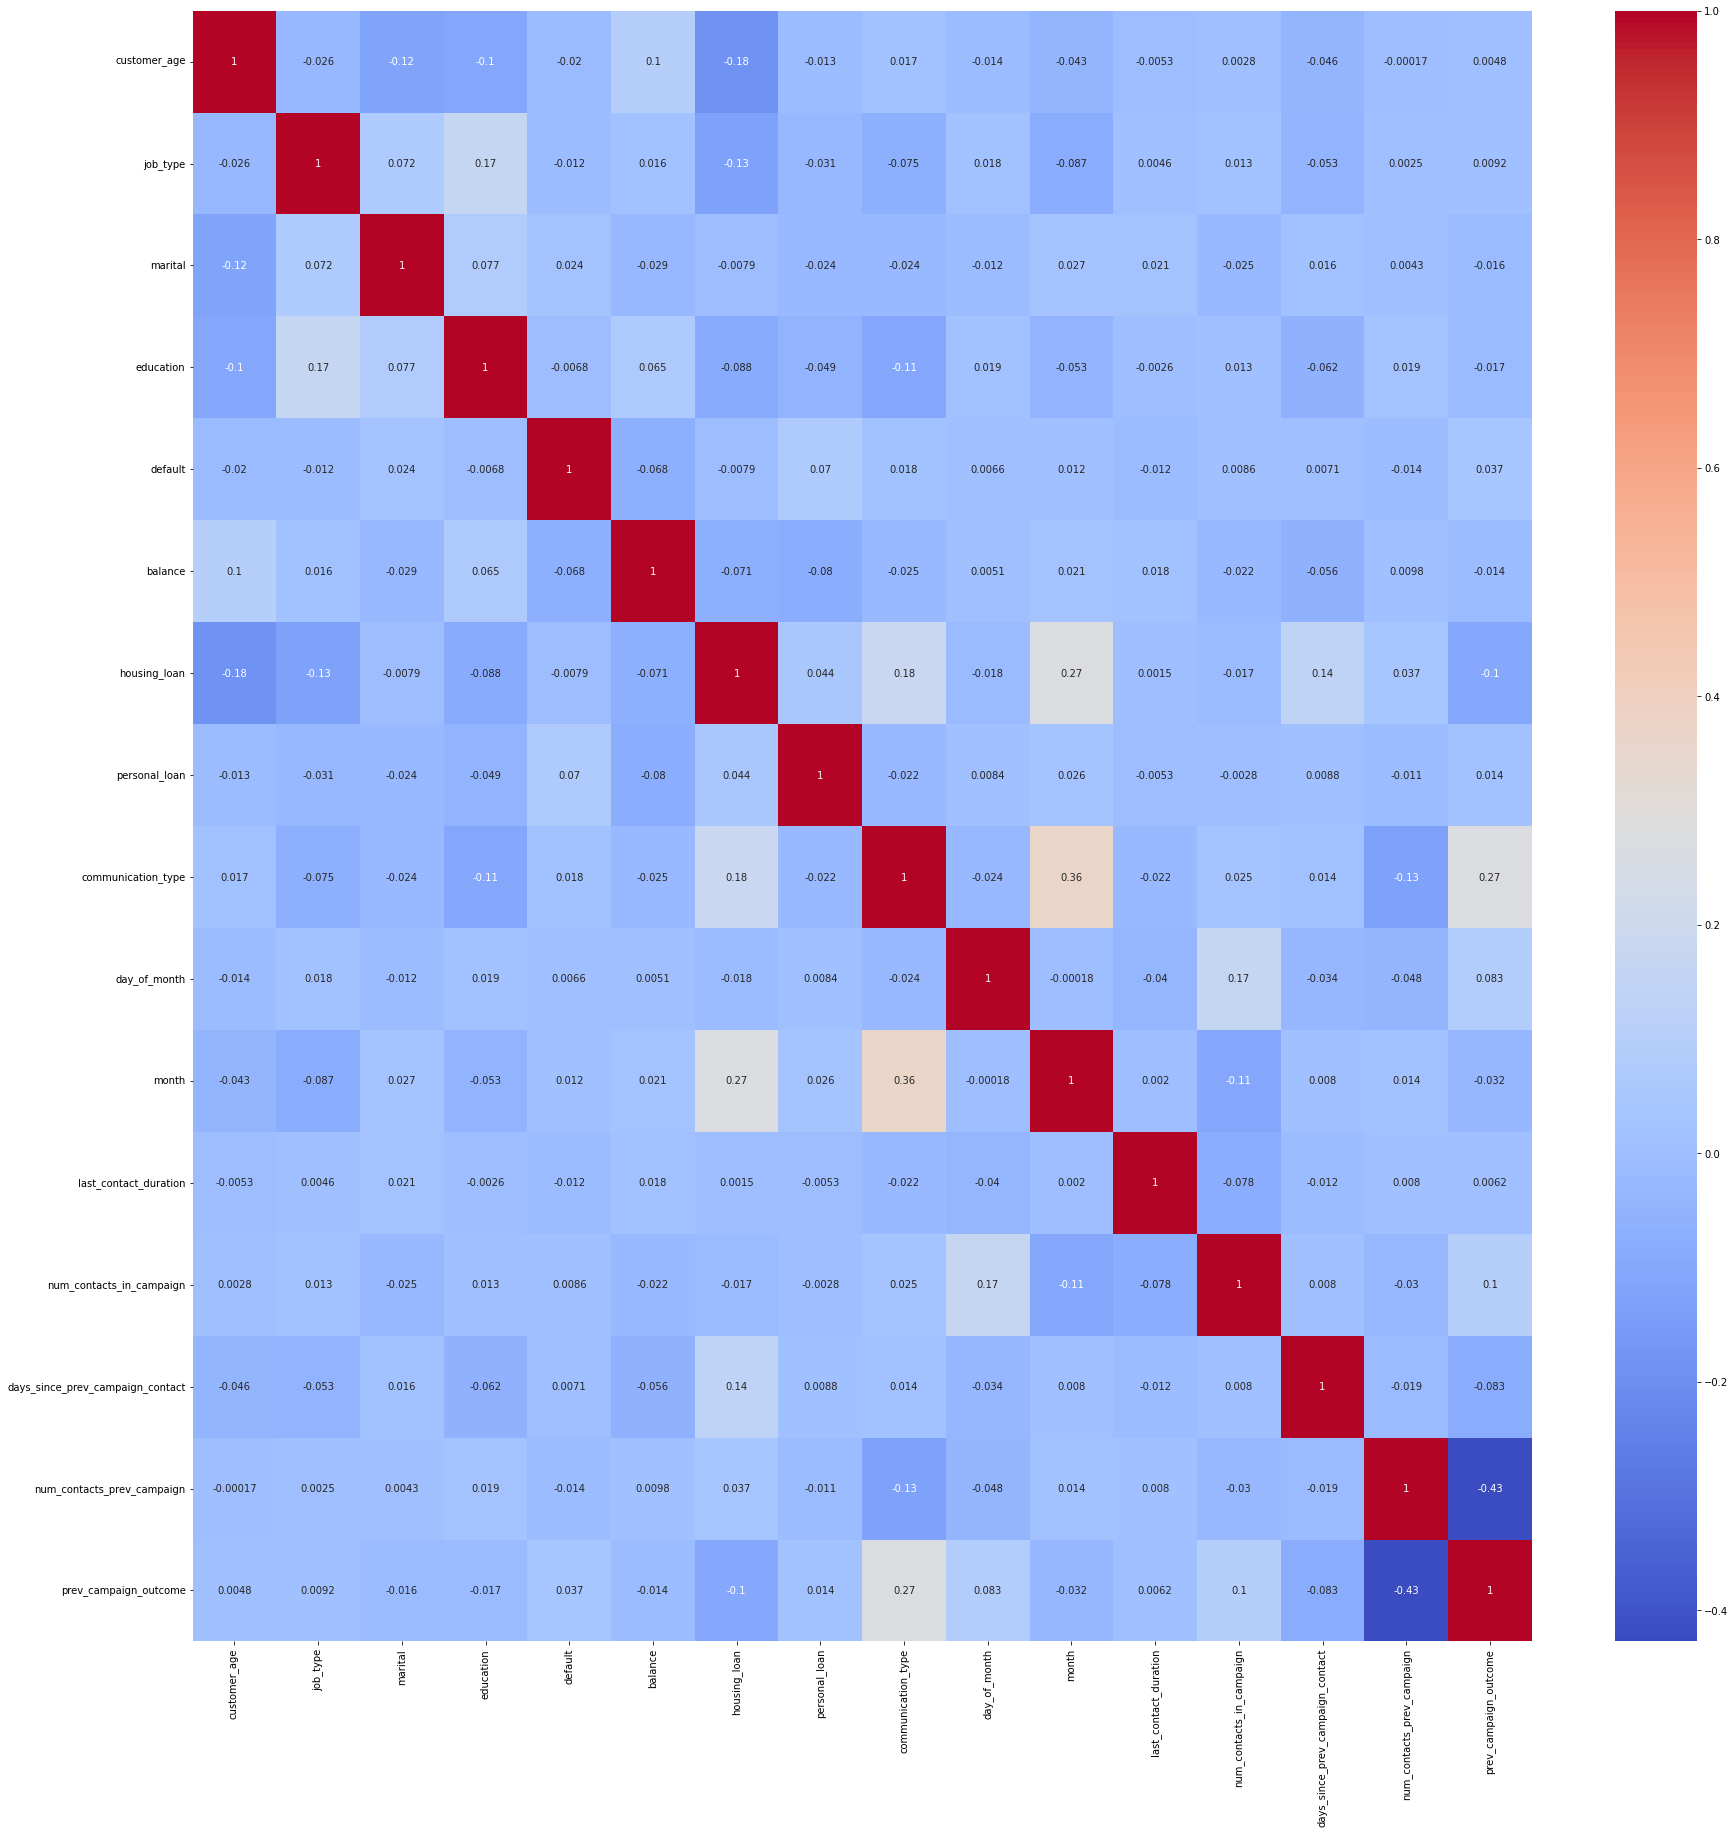

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,30))
#Printing the heatmap itself
sns.heatmap(x_train.corr(), annot = True, cmap='coolwarm')

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

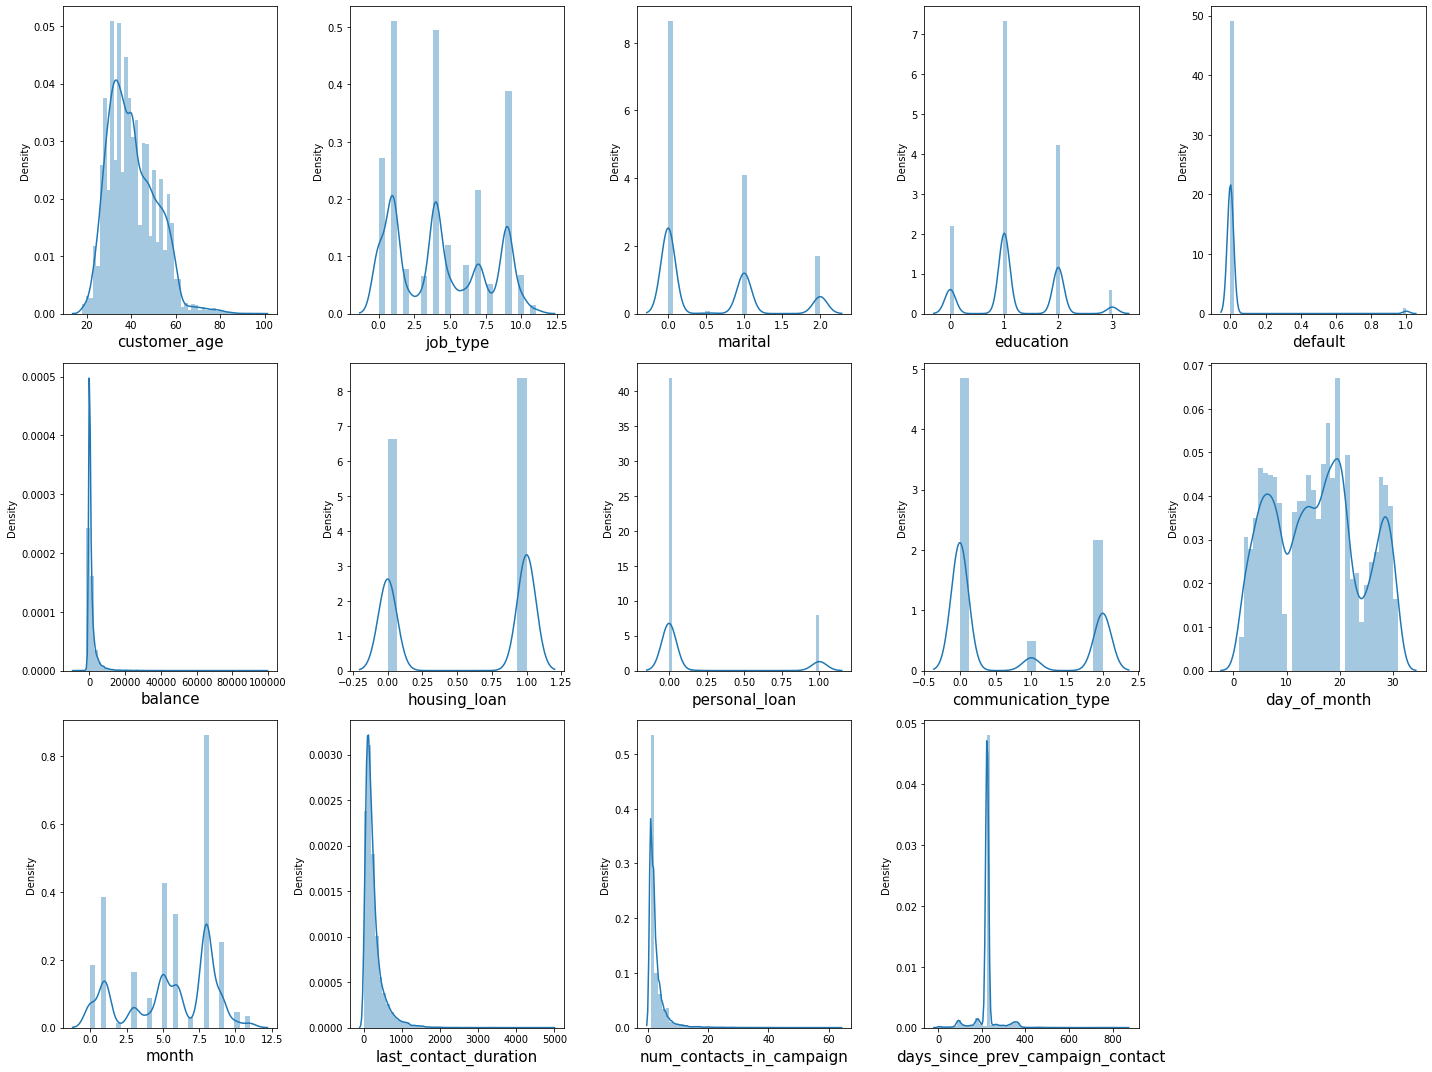

In [15]:
# Data distribution for every column
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in x_train:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(x_train[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [16]:

from sklearn.cluster import KMeans



In [20]:
for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x_train)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x_train, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8453903941211717)
For n_clusters = 3, silhouette score is 0.7701435494182637)
For n_clusters = 4, silhouette score is 0.6982107499241338)
For n_clusters = 5, silhouette score is 0.686547417477981)
For n_clusters = 6, silhouette score is 0.6016692413295956)
For n_clusters = 7, silhouette score is 0.5777834436027932)
For n_clusters = 8, silhouette score is 0.5762235785845421)
For n_clusters = 9, silhouette score is 0.538877367872731)
For n_clusters = 10, silhouette score is 0.5293897642339089)
For n_clusters = 11, silhouette score is 0.522639469867669)
For n_clusters = 12, silhouette score is 0.4316897852841948)
For n_clusters = 13, silhouette score is 0.42638400191783193)
For n_clusters = 14, silhouette score is 0.4048270418174854)
For n_clusters = 15, silhouette score is 0.43653345065237514)
For n_clusters = 16, silhouette score is 0.4355772426118318)
For n_clusters = 17, silhouette score is 0.42236729372445614)
For n_clusters = 18, silhouette 

In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def draw_silhouette_plot(X, n_clusters):
    clusters = KMeans(n_clusters = n_clusters, random_state = 69)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    #Compute the silhouette score for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    plt.xlim([-1, 1])
    plt.ylim([0, len(X) + (n_clusters+1)*10])
    plt.yticks([])
    plt.xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color =cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color
                         , edgecolor = color, alpha = 0.7)
        
        y_lower = y_upper +10
        
        plt.axvline(x = silhouette_avg, color="red", linestyle="--")
        plt.title(f'Thes Silhouette Plot for n_clusters = {n_clusters}')
        
        plt.legend(['Silhouette Score']+[f'Cluster {i}' for i in range(n_clusters)])
        



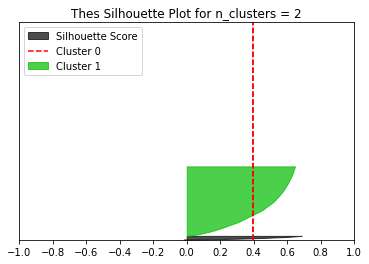

In [22]:
draw_silhouette_plot(x_train, 2)

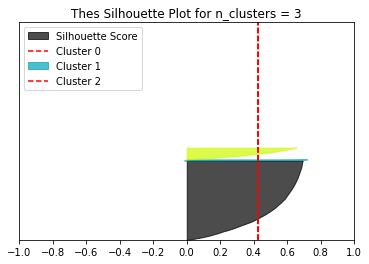

In [23]:
draw_silhouette_plot(x_train, 3)

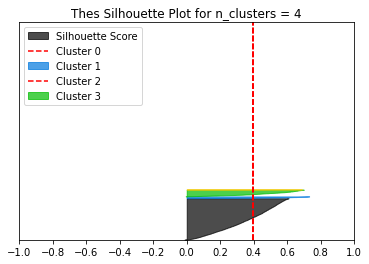

In [24]:
draw_silhouette_plot(x_train, 4)

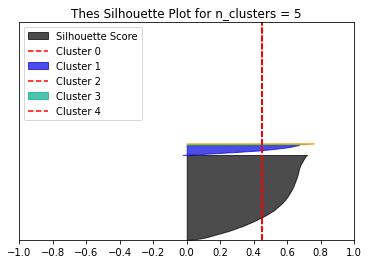

In [25]:
draw_silhouette_plot(x_train, 5)

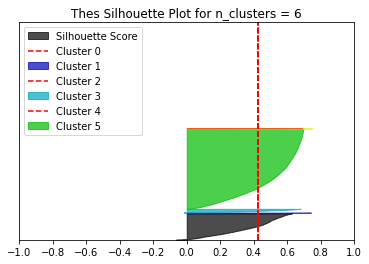

In [26]:
draw_silhouette_plot(x_train, 6)

C:\Users\balam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.


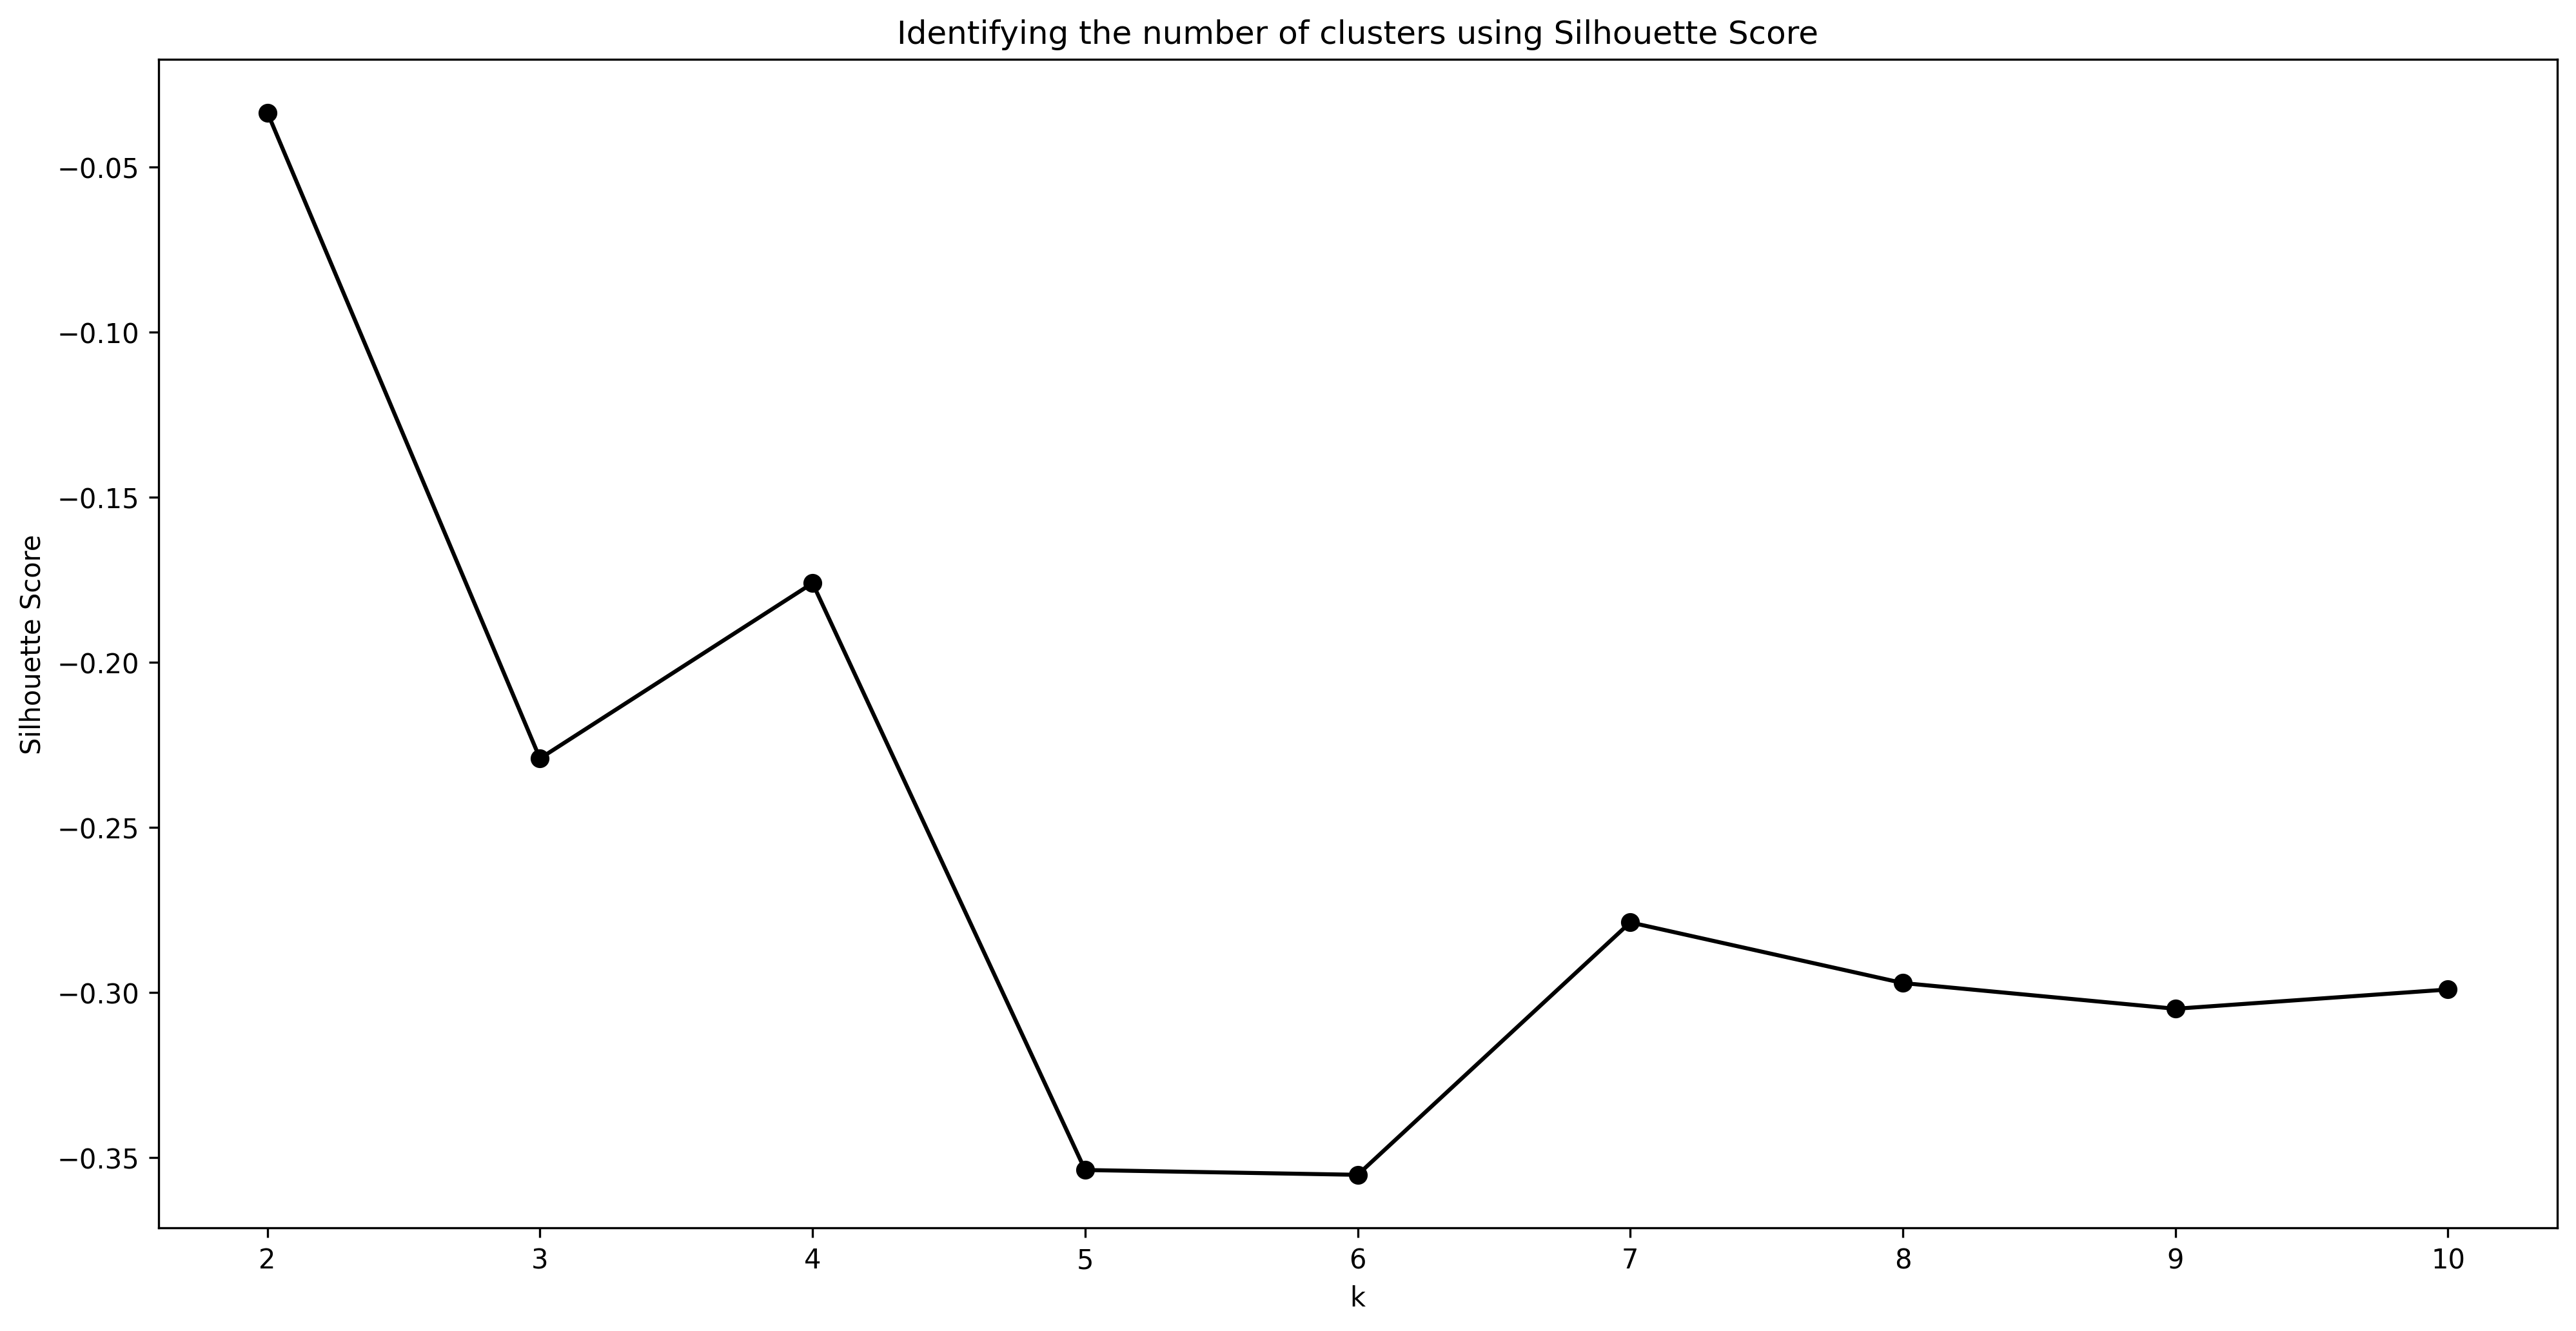

In [27]:
from sklearn.mixture import GaussianMixture
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = x_train

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=200)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identifying the number of clusters using Silhouette Score')
plt.show()

Accuracy score =  0.3417588204318062


Text(0.5, 257.44, 'Predicted label')

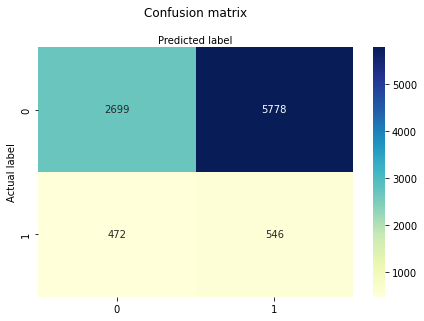

In [30]:
gmm = GaussianMixture(n_components=2, max_iter=300, random_state=777)
gmm.fit(x_train)

y_pred = gmm.predict(x_test)
print('Accuracy score = ', accuracy_score(y_pred, y_test))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [31]:
model.means_

array([[ 3.89033489e+01,  4.02227723e+00,  6.42365908e-01,
         1.18564356e+00,  1.00000000e+00, -1.27322864e+02,
         5.29702970e-01,  3.47325997e-01,  7.62376238e-01,
         1.62103960e+01,  5.78960396e+00,  2.34798852e+02,
         2.96671599e+00,  2.27752921e+02,  3.24257426e-01,
         2.82673267e+00],
       [ 3.97907735e+01,  4.34280495e+00,  5.69479129e-01,
         1.29892635e+00,  0.00000000e+00,  1.20678348e+03,
         6.21050133e-01,  0.00000000e+00,  0.00000000e+00,
         1.43252226e+01,  5.62814967e+00,  2.60019078e+02,
         1.99594720e+00,  2.23884230e+02,  2.86248759e+00,
         6.19236192e-01],
       [ 5.38750000e+01,  3.37500000e+00,  5.00000000e-01,
         1.37500000e+00,  0.00000000e+00,  6.20726250e+04,
         2.50000000e-01,  1.25000000e-01,  5.00000000e-01,
         1.27500000e+01,  5.12500000e+00,  2.57625000e+02,
         2.50000000e+00,  2.20495787e+02,  1.25000000e-01,
         2.87500000e+00],
       [ 4.02528311e+01,  4.22183339e

In [32]:
model = KMeans(n_clusters = 2, random_state=24)
model.fit(x_train)

KMeans(n_clusters=2, random_state=24)

In [33]:
model.cluster_centers_

array([[4.03006127e+01, 4.30226534e+00, 5.22625564e-01, 1.21556068e+00,
        1.90269863e-02, 8.96972552e+02, 5.63745114e-01, 1.63490163e-01,
        6.46493666e-01, 1.58051618e+01, 5.52121697e+00, 2.56277607e+02,
        2.77413132e+00, 2.25510123e+02, 5.96618471e-01, 2.55894127e+00],
       [4.35190723e+01, 4.63329706e+00, 4.51681133e-01, 1.39934712e+00,
        0.00000000e+00, 1.18008923e+04, 4.39608270e-01, 6.75940805e-02,
        5.68008705e-01, 1.59390642e+01, 5.82480958e+00, 2.67457132e+02,
        2.65819711e+00, 2.17085367e+02, 6.44178455e-01, 2.52774755e+00]])

In [34]:
y_pred =model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy Score =', accuracy_score(y_pred, y_test))

Accuracy Score = 0.8601369141653502


Text(0.5, 257.44, 'Predicted label')

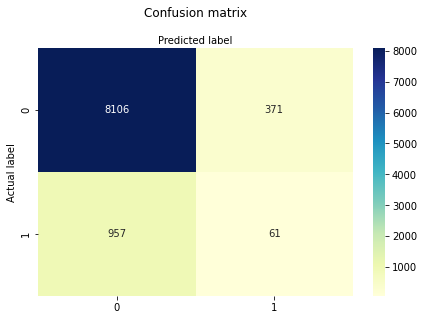

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')